# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 8 - Matplotlib

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum (zamień zmienne `imie` oraz `nazwisko` na odpowiednie wartości):

```
+-- 📂 [imie].[naziwsko].zip
    +-- 📂 animals
        +-- [...]
    +-- 📜 Laboratorium 8.ipynb
    +-- 📜 animals.npz
    +-- 📜 Zad1.py
    +-- 📜 Zad2.py
    +-- 📜 Zad3.py
    +-- 📜 Zad4.py
    +-- 📜 Zad5.py
```


## Zadanie 1 (meshgrid)

**UWAGA: Zadania wykonaj w osobnych plikach `*.py`, gdyż jupyter notebook często nie radzi sobie z animacjami bądz zdarzeniami**

Korzystając z funkcji `contourf` i `contour` uzupełnij poniższy kod w ten sposób, aby wygenerować obrazek podobny do `Figure_1.png`:

<img style="height:200px" src="Figure_1.png" />

*Wskazówka: zapoznaj się z działaniem funkcji `np.meshgrid`.*

```python
import numpy as np
import matplotlib.pyplot as plt

def f(x,y): return 0.5*np.sin(x**3) + 0.25*np.sin((y + np.pi)**2)

n = 100
x = np.linspace(-np.pi/2,np.pi/2,n)
y = np.linspace(-np.pi,np.pi/2,n)


```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

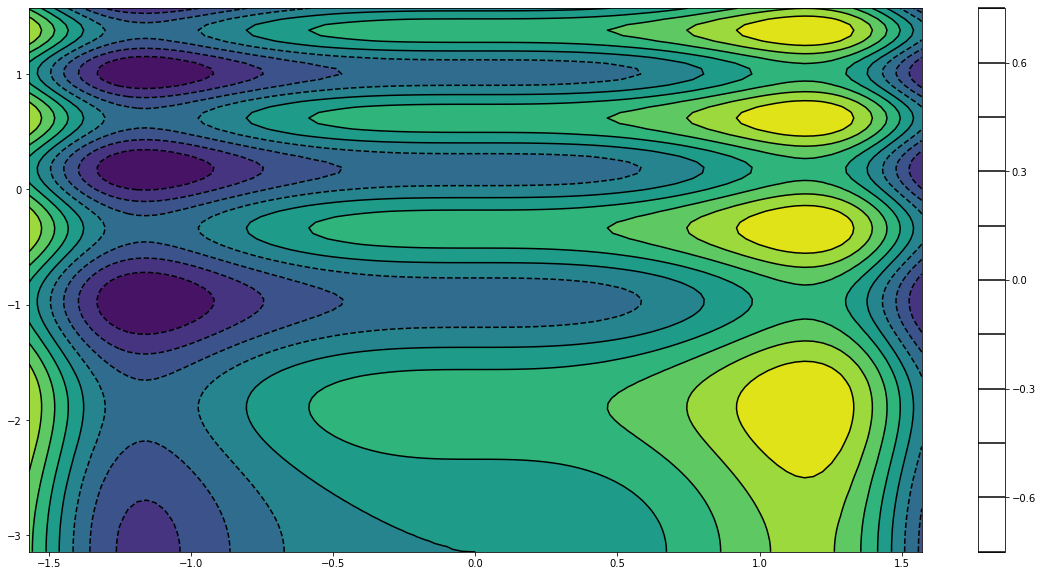

In [2]:
def f(x ,y): return 0.5*np.sin(x**3) + 0.25*np.sin((y + np.pi)**2)

n = 100
x = np.linspace(-np.pi/2,np.pi/2,n)
y = np.linspace(-np.pi,np.pi/2,n)

XX, YY = np.meshgrid(x,y)
mesh_data = np.c_[XX.ravel(), YY.ravel()]
Z = f(mesh_data[:, 0], mesh_data[:, 1]).reshape(XX.shape)

plt.figure(figsize=(20, 10))
plt.contourf(XX, YY, Z, alpha=1, levels=10)
plt.contour(XX, YY, Z, alpha=1, levels=10, colors='black')
plt.colorbar()
plt.xlim(-np.pi/2,np.pi/2)
plt.ylim(-np.pi,np.pi/2)
plt.show()


## Zadanie 2 (animacje)

Do poprzedniego zadania dodaj animację korzystając z funkcji `matplotlib.animation.FuncAnimation`.

<img style="height:200px" src="Figure_2.gif" />

1. Należy napisać funkcję, która generuje wykres w danym punkcie czasowym. Przykład funkcji:
```python
def animate(i):
    # wyświetl wykres w momencie (kroku/klatce) i
```

2. Następnie dodać tą animację do obrazu, jak poniżej:
```python
matplotlib.animation.FuncAnimation(fig, animate, frames=80, interval=100, repeat=False)
```

3. Możesz wykorzystać poniższy szablon do realizacji tego zadania (należy usupełnić):

```python
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

def f(x, y, t): return 0.5*np.sin(x**3) + 0.25*np.sin((y - t)**2)

n = 100
x = np.linspace(-np.pi/2,np.pi/2,n)
y = np.linspace(0,np.pi*1.5,n)

res = [[f(xx, yy, 0) for xx in x] for yy in y]

X,Y = np.meshgrid(x,y)

fig, ax = plt.subplots(figsize=(10,7))

ax.set_xlim(-np.pi/2,np.pi/2)
ax.set_ylim(0,np.pi*1.5)

# uzupełnij (wyświetl obraz za pomocą `contourf` i `contour`).

def animate(i):
    # uzupełnij

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=80, interval=100, repeat=False) 
plt.show()
```

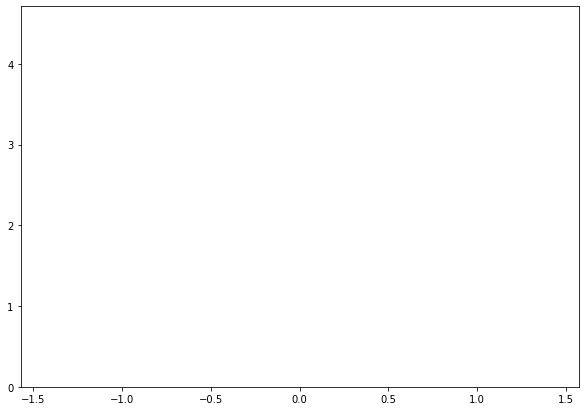

In [12]:
def f(x, y, t): return 0.5*np.sin(x**3) + 0.25*np.sin((y - t)**2)

n = 100
x = np.linspace(-np.pi/2,np.pi/2,n)
y = np.linspace(0,np.pi*1.5,n)

XX, YY = np.meshgrid(x,y)
mesh_data = np.c_[XX.ravel(), YY.ravel()]

fig, ax = plt.subplots(figsize=(10,7))

ax.set_xlim(-np.pi/2,np.pi/2)
ax.set_ylim(0,np.pi*1.5)

# uzupełnij (wyświetl obraz za pomocą `contourf` i `contour`).

def animate(i):
    ax.clear()
    Z = f(mesh_data[:, 0], mesh_data[:, 1], i).reshape(XX.shape)
    ax.contourf(XX, YY, Z, alpha=1, levels=10)
    ax.contour(XX, YY, Z, alpha=1, levels=10, colors='black')
    plt.draw()


ani = FuncAnimation(fig, animate, frames=80, interval=100, repeat=False)
ani.repeat = True
plt.show()

## Zadanie 3 (3D).

Wyświetl obraz z zadania 1 w trójwymiarze (3D) za pomocą funkcji `plot_surface` (aby uzyskać podobny efekt jak na obrazie poniżej użyj parametru `cmap="gist_ncar"`).

<img style="height:200px" src="Figure_3.png" />

*Wskazówka: Należy zaimportować: `import mpl_toolkits.mplot3d.axes3d as p3`*

Przydatne funkcje:
* `ax = p3.Axes3D(fig)`
* `ax.set_xlim3d([-np.pi/2,np.pi/2])` - dla x
* `ax.set_ylim3d([0,np.pi*1.5])` - dla y


## Zadanie 4 (Animacja w 3D)

Dodaj animację do zadania 3 (analogicznie do zadania 2).

<img style="height:200px" src="Figure_4.gif" />


## Zadanie 5 (Anotacje i wczytywanie obrazów)

<img style="height:200px" src="Figure_5.png" />

1. Należy wyświetlić wykres punktowy (scatter plot) dwóch cech (np. wzrost i waga) zwierząt.
2. Wczytać zdjęcia zwierząt z plików.
2. Dodać graficzne anotacje do punktów.
3. Obsłużyć zdarzenia myszy w celu wyświetlania anotacji w momencie kiedy kursor znajduje się w pozycji znajdującej się nad danym punktem.

Wskazówki:
* Aby wczytać dane z bazy możesz użyć poniższy fragment kodu:
```python
with open('animals.npz', 'rb') as f:
    animals = np.load(f)['animals']
```
* Do wczytywania obrazów wykorzystaj `matplotlib.image.imread()`
* Zapoznaj się z obiektami: `matplotlib.offsetbox.OffsetImage` oraz `matplotlib.offsetbox.AnnotationBbox`
* `AnnotationBbox` posiada funkcję `set_visible`, która umożliwia zarządzanie widocznością obiektu.
* Aby dodać zdarzenie użyj kodu: `fig.canvas.mpl_connect("motion_notify_event", hover)`, hdzie hover to nazwa funkcji obsługującej zdarzenie przyjmująca jeden parametr `event`.
* Przykład dodania anotacji dostępny jest pod adresem: https://matplotlib.org/stable/gallery/text_labels_and_annotations/demo_annotation_box.html
* Przykład obsługi zdarzenia dostępny jest pod adresem: https://matplotlib.org/stable/users/event_handling.html




In [14]:
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation


with open('animals.npz', 'rb') as f:
    animals = np.load(f)['animals']

In [18]:
animals

array([['cat', '4', '1.5', '25', 'animals/0.jpg'],
       ['cat', '4', '2.1', '29', 'animals/1.jpg'],
       ['cat', '4', '1.1', '23', 'animals/2.jpg'],
       ['dog', '4', '15', '57', 'animals/3.jpg'],
       ['dog', '4', '25', '80', 'animals/4.jpg'],
       ['dog', '4', '20', '60', 'animals/5.jpg'],
       ['chicken', '2', '2.2', '35', 'animals/6.jpg'],
       ['chicken', '2', '2.8', '43', 'animals/7.jpg'],
       ['chicken', '2', '2.5', '37', 'animals/8.jpg']], dtype='<U13')